In [66]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Input, regularizers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [67]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [68]:
X_test.shape

(10000, 32, 32, 3)

In [69]:
y_train.shape

(50000, 1)

In [70]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [71]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [72]:
classes = ["airplanes", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [73]:
def plot_sample(X, y, index): 
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

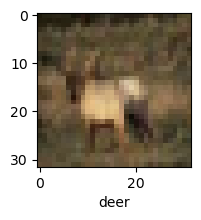

In [74]:
plot_sample(X_train, y_train, 3)

In [75]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [76]:
cnn = models.Sequential([
    Input(shape=(32, 32, 3)), 
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
           )

cnn.fit(X_train, y_train, epochs=10)



Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3967 - loss: 1.6536
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6043 - loss: 1.1256
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6552 - loss: 0.9858
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6917 - loss: 0.8863
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7163 - loss: 0.8151
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7363 - loss: 0.7486
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7584 - loss: 0.6881
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7756 - loss: 0.6387
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7945 - loss: 0.5865
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8108 - loss: 0.5455


In [77]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6993 - loss: 0.9538


[0.9563947319984436, 0.6938999891281128]

In [78]:
cnn.save('cifar10_model_simple_acc_69.keras')

In [80]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


cnn = models.Sequential([
    Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer=Adam(learning_rate=0.0001),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
           )

cnn.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_test,y_test),
    callbacks=[early_stopping]
)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.2113 - loss: 3.9210 - val_accuracy: 0.4350 - val_loss: 2.5589
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.3534 - loss: 2.8914 - val_accuracy: 0.5175 - val_loss: 2.1319
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.4272 - loss: 2.3821 - val_accuracy: 0.5511 - val_loss: 1.8617
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.4677 - loss: 2.0420 - val_accuracy: 0.5780 - val_loss: 1.6176
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.5113 - loss: 1.7770 - val_accuracy: 0.5887 - val_loss: 1.4777
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.5400 - loss: 1.5894 - val_accuracy: 0.6258 - val_loss: 1.2969
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.5627 - loss: 1.4478 - val_accuracy: 0.6170 - val_loss: 1.2452
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 

In [81]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7837 - loss: 0.6517


[0.6616923809051514, 0.7782999873161316]

In [82]:
cnn.save('cifar10_model_complex_78.keras')
